This notebook will use evaluation code to make some plots of MARS's performance on test data.

In [1]:
%matplotlib inline

from evaluation import evaluation
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [64]:
from MARSeval.cocoeval import COCOeval
from MARSeval.coco import COCO

gt_coco = COCO()
gt_coco.dataset = cocodata['gt_keypoints']
gt_coco.createIndex()
pred_coco = gt_coco.loadRes(cocodata['pred_keypoints'])
    
    
cocoEval = COCOeval(gt_coco, pred_coco, iouType='keypoints', sigmaType='MARS_front', useParts=cocodata['partNames'][:7])
cocoEval.evaluate()

creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.86s).


creating index...
index created!
Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.91s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.902
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.957
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.924
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.991
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.970
creating index...
index created!
Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.72s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  

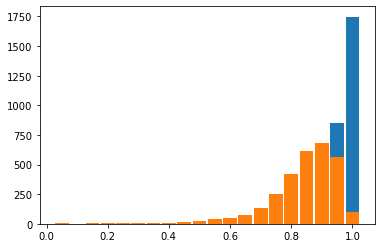

In [116]:
# fid = 'D:\\MARS_eval_test\\front\\MARS_performance_pose_nofeet.json'
fid = 'D:\\MARS_eval_test\\top\\MARS_performance_pose.json'

coco = evaluation.eval_coco(fid)
oks=[]
for i in coco.params.imgIds:
    oks.append(coco.computeOks(i,1)[0][0])
    
coco = evaluation.eval_coco(fid,fixedSigma='narrow')
oks2=[]
for i in coco.params.imgIds:
    oks2.append(coco.computeOks(i,1)[0][0])

# sc=0.05
# sns.kdeplot(oks, bw=sc)
# sns.kdeplot(oks2, bw=sc)

# sns.ecdfplot(oks)
# sns.ecdfplot(oks2)

counts,bins=np.histogram(oks,20,(0,1))
plt.bar(bins[1:],counts,0.9/20)

counts,bins=np.histogram(oks2,20,(0,1))
plt.bar(bins[1:],counts,0.9/20)

plt.savefig('D:\\MARS_eval_test\\top\\OKS_compare_bar.pdf')

In [3]:
# tfrecords       = ['P:\\cristina_code_original\\tfrecords\\test_dataset-00000-of-00001']
# checkpoint_path = 'P:\\cristina_code_original\\results_keypoints\\top_fixed'
# summary_dir     = 'P:\\MARS_eval_test\\'
# config          = 'P:\\cristina_code_original\\config_files\\config_test.yaml'

tfrecords       = ['D:\\MARS_data\\tfrecords\\tfrecords_pose_top\\test_dataset-00000-of-00001']
checkpoint_path = 'X:\\cristina_code_original\\results_keypoints\\top_fixed'
summary_dir     = 'D:\\MARS_eval_test\\top\\'
config          = 'D:\\MARS_data\\tfrecords\\tfrecords_pose_top\\config_test.yaml'

# tfrecords       = ['D:\\MARS_data\\tfrecords\\tfrecords_pose_front\\test_dataset-00000-of-00001']
# checkpoint_path = 'X:\\cristina_code_original\\results_keypoints\\front'
# summary_dir     = 'D:\\MARS_eval_test\\front\\'
# config          = 'D:\\MARS_data\\tfrecords\\tfrecords_pose_front\\config_test.yaml'

# optional inputs
view                = 'top'    # top or front camera
max_iterations      = 0          # only run on the first X images (set to 0 to run on all data)- useful for debugging
prep_cocoEval       = True       # whether to save evaluation results for future analysis with MARSeval

evaluation.process_tfrecord(tfrecords, checkpoint_path, summary_dir, config,
                            view=view,
                            max_iterations=max_iterations,
                            prep_cocoEval=prep_cocoEval)

X:\cristina_code_original\results_keypoints\top_fixed
is now:X:\cristina_code_original\results_keypoints\top_fixed\model.ckpt-539952
INFO:tensorflow:Restoring parameters from X:\cristina_code_original\results_keypoints\top_fixed\model.ckpt-539952
Found model for global step: 539952
Step: 0, Time/image network (ms): 729.6
Step: 1, Time/image network (ms): 490.5
Step: 2, Time/image network (ms): 479.0
Step: 3, Time/image network (ms): 490.7
Step: 4, Time/image network (ms): 469.2
Step: 5, Time/image network (ms): 480.9
Step: 6, Time/image network (ms): 482.6
Step: 7, Time/image network (ms): 475.8
Step: 8, Time/image network (ms): 482.1
Step: 9, Time/image network (ms): 474.5
Step: 10, Time/image network (ms): 462.5
Step: 11, Time/image network (ms): 476.7
Step: 12, Time/image network (ms): 464.9
Step: 13, Time/image network (ms): 490.3
Step: 14, Time/image network (ms): 491.9
Step: 15, Time/image network (ms): 481.3
Step: 16, Time/image network (ms): 476.5
Step: 17, Time/image network (

Step: 191, Time/image network (ms): 479.3
Step: 192, Time/image network (ms): 478.5
Step: 193, Time/image network (ms): 479.2
Step: 194, Time/image network (ms): 477.4
Step: 195, Time/image network (ms): 479.1
Step: 196, Time/image network (ms): 481.0
Step: 197, Time/image network (ms): 478.6
Step: 198, Time/image network (ms): 477.2
Step: 199, Time/image network (ms): 480.2
Step: 200, Time/image network (ms): 480.0
Step: 201, Time/image network (ms): 479.9
Step: 202, Time/image network (ms): 478.3
Step: 203, Time/image network (ms): 479.0
Step: 204, Time/image network (ms): 475.3
Step: 205, Time/image network (ms): 478.6
Step: 206, Time/image network (ms): 480.0
Step: 207, Time/image network (ms): 478.7
Step: 208, Time/image network (ms): 480.2
Step: 209, Time/image network (ms): 479.3
Step: 210, Time/image network (ms): 474.9
Step: 211, Time/image network (ms): 479.8
Step: 212, Time/image network (ms): 479.6
Step: 213, Time/image network (ms): 478.6
Step: 214, Time/image network (ms)